
# ITI Students Analytics — Simulated Dataset (12,000+ records)

This notebook analyzes a **synthetic** dataset representing students at the *Information Technology Institute (Egypt)* across multiple **tracks** (Data Science, Power BI Development, Data Analysis, Data Engineering, Software Testing, Web Application Development, AI Engineering, Cybersecurity, Cloud Engineering).

It includes KPIs like **attendance, certificates, exams, freelancing income, projects, employment status** and more.

> 📦 Data file: `iti_DATASET.csv`  




## Data Dictionary (selected)

- `student_id`: unique integer id
- `full_name`: student full name (Egyptian)
- `gender`: M/F
- `age`: student age (18–40)
- `governorate`: Egyptian governorate
- `admission_cohort`: monthly cohort start date (2022-01 .. 2025-09)
- `track`: learning track
- `attendance_rate`: [0,1] fraction of sessions attended
- `sessions_attended`, `total_sessions`: detailed attendance
- `exams_score`: 0–100
- `certificates_count`: count of finished certificates
- `certificate_providers`: comma-separated providers when present
- `freelancing_income_usd_total`: total income (log-normal, sparse)
- `freelancing_income_usd_monthly_est`: rough monthly estimate (if freelancing)
- `projects_delivered`: project count during/after program
- `employment_status`: Unemployed/Intern/Freelancer/Part-time/Full-time/Further Study
- `internship_company`: if employed
- `mentor_name`: assigned mentor
- `warnings_count`: disciplinary/attendance warnings
- `dropout_flag`: 1 if dropped out
- `graduated_flag`: 1 if graduated
- `graduation_date`: date if graduated



## Business Questions

1. **Placement & Readiness**
   - Q1: Which **tracks** have the **highest placement** (Intern/Part-time/Full-time)?
   - Q2: What's the **relationship** between **attendance** and **exam scores**?
   - Q3: What **attendance threshold** best predicts **graduation**?

2. **Freelancing & Certifications**
   - Q4: Do **certificates** correlate with **freelancing income**?
   - Q5: Which **certificate providers** are common among **high earners**?

3. **Operations & Quality**
   - Q6: Which cohorts/governorates show **higher dropout** or **warnings**?
   - Q7: **Data quality** check: missing values % per column, duplicate students, outliers.

4. **Program Design**
   - Q8: Are **projects_delivered** a stronger predictor of **employment** than exams?
   - Q9: What is the **optimal track mix** for future cohorts to maximize employment?

5. **KPI Dashboards**
   - Q10: Build quick KPIs: **Graduation Rate**, **Employment Rate**, **Avg Exam**, **Avg Attendance**, **Freelancers %**, **Avg Freelance Income** by track.


### Data Quality & Outliers

In [3]:
import pandas as pd

ITI_data = pd.read_csv("ITI_DATASet.csv")
pd.set_option('display.max_columns', None)
ITI_data

,student_id,full_name,gender,age,governorate,admission_cohort,track,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,certificate_providers,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,internship_company,mentor_name,email,phone,github_url,linkedin_url,warnings_count,dropout_flag,graduated_flag,graduation_date
0,1,Sara Fouad,F,25,Monufia,2023-03-01,Data Science,0.774,46,60,100.0,0,NaN,0.00,0.00,4,Unemployed,NaN,Dr. Amr,sara.fouad0000@iti.eg,2.001500e+12,https://github.com/sarafouad0000,https://www.linkedin.com/in/sara-fouad-0000/,0,0,1,2023-07-19
1,2,Hany Said,M,26,Monufia,2024-05-01,Software Testing,0.400,24,60,72.6,0,NaN,0.00,0.00,3,Intern,Orange,Dr. Heba,NaN,2.001151e+12,https://github.com/hanysaid0001,https://www.linkedin.com/in/hany-said-0001/,1,0,0,NaN
2,3,Mohamed Sami,M,19,Aswan,2022-08-01,Cloud Engineering,0.762,73,96,83.0,0,NaN,43.31,21.66,3,Freelancer,NaN,Eng. Mona,mohamed.sami0002@iti.eg,2.001293e+12,https://github.com/mohamedsami0002,https://www.linkedin.com/in/mohamed-sami-0002/,1,0,1,2023-03-13
3,4,Abdelrahman Farag,M,33,Gharbia,2023-12-01,Data Analysis,0.632,53,84,75.7,0,NaN,0.00,0.00,4,Full-time,Orange,Eng. Mona,abdelrahman.farag0003@iti.eg,2.001128e+12,https://github.com/abdelrahmanfarag0003,https://www.linkedin.com/in/abdelrahman-farag-...,1,0,1,2024-06-14
4,5,Mohamed Hegazy,M,18,Minya,2023-06-01,Data Science,0.545,46,84,77.4,0,NaN,14.52,1.81,1,Full-time,Careem,Eng. Mona,mohamed.hegazy0004@iti.eg,2.001142e+12,https://github.com/mohamedhegazy0004,NaN,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,Mona Shaker,F,24,Giza,2025-04-01,Cloud Engineering,0.523,31,60,80.6,0,NaN,15.74,5.25,0,Freelancer,NaN,Eng. Ahmed,mona.shaker1995@iti.eg,2.001051e+12,https://github.com/monashaker1995,https://www.linkedin.com/in/mona-shaker-1995/,2,0,0,NaN
11996,11997,Omar Lotfy,M,21,Dakahlia,2023-02-01,AI Engineering,0.716,60,84,87.4,4,"Coursera,Google,IBM,Udacity",0.00,0.00,8,Further Study,NaN,Dr. Hossam,omar.lotfy1996@iti.eg,2.001101e+12,https://github.com/omarlotfy1996,https://www.linkedin.com/in/omar-lotfy-1996/,4,0,1,2023-08-16
11997,11998,Khaled Ali,M,25,Minya,2025-04-01,Web Application Development,0.598,36,60,90.0,0,NaN,0.00,0.00,4,Part-time,Instabug,Eng. Ahmed,khaled.ali1997@iti.eg,2.001282e+12,https://github.com/khaledali1997,https://www.linkedin.com/in/khaled-ali-1997/,1,0,0,NaN
11998,11999,Hussein Fathy,M,32,Qalyubia,2022-07-01,Data Science,0.478,46,96,67.7,2,DataCamp,7.31,1.46,2,Further Study,NaN,Eng. Rania,hussein.fathy1998@iti.eg,2.001234e+12,https://github.com/husseinfathy1998,https://www.linkedin.com/in/hussein-fathy-1998/,3,0,0,NaN


In [2]:
ITI_data.head()

,student_id,full_name,gender,age,governorate,admission_cohort,track,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,certificate_providers,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,internship_company,mentor_name,email,phone,github_url,linkedin_url,warnings_count,dropout_flag,graduated_flag,graduation_date
0,1,Sara Fouad,F,25,Monufia,2023-03-01,Data Science,0.774,46,60,100.0,0,NaN,0.00,0.00,4,Unemployed,NaN,Dr. Amr,sara.fouad0000@iti.eg,2.001500e+12,https://github.com/sarafouad0000,https://www.linkedin.com/in/sara-fouad-0000/,0,0,1,2023-07-19
1,2,Hany Said,M,26,Monufia,2024-05-01,Software Testing,0.400,24,60,72.6,0,NaN,0.00,0.00,3,Intern,Orange,Dr. Heba,NaN,2.001151e+12,https://github.com/hanysaid0001,https://www.linkedin.com/in/hany-said-0001/,1,0,0,NaN
2,3,Mohamed Sami,M,19,Aswan,2022-08-01,Cloud Engineering,0.762,73,96,83.0,0,NaN,43.31,21.66,3,Freelancer,NaN,Eng. Mona,mohamed.sami0002@iti.eg,2.001293e+12,https://github.com/mohamedsami0002,https://www.linkedin.com/in/mohamed-sami-0002/,1,0,1,2023-03-13
3,4,Abdelrahman Farag,M,33,Gharbia,2023-12-01,Data Analysis,0.632,53,84,75.7,0,NaN,0.00,0.00,4,Full-time,Orange,Eng. Mona,abdelrahman.farag0003@iti.eg,2.001128e+12,https://github.com/abdelrahmanfarag0003,https://www.linkedin.com/in/abdelrahman-farag-...,1,0,1,2024-06-14
4,5,Mohamed Hegazy,M,18,Minya,2023-06-01,Data Science,0.545,46,84,77.4,0,NaN,14.52,1.81,1,Full-time,Careem,Eng. Mona,mohamed.hegazy0004@iti.eg,2.001142e+12,https://github.com/mohamedhegazy0004,NaN,1,0,0,NaN


In [3]:

ITI_data.sample(frac = 0.02)

,student_id,full_name,gender,age,governorate,admission_cohort,track,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,certificate_providers,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,internship_company,mentor_name,email,phone,github_url,linkedin_url,warnings_count,dropout_flag,graduated_flag,graduation_date
6105,6106,Ali Hassan,M,25,Sharqia,2022-12-01,Web Application Development,0.616,52,84,76.7,0,NaN,8.86,1.48,3,Unemployed,NaN,Dr. Karim,ali.hassan6105@iti.eg,2.001122e+12,https://github.com/alihassan6105,https://www.linkedin.com/in/ali-hassan-6105/,1,0,0,NaN
652,653,Lobna Fouad,F,24,Cairo,2025-03-01,Data Engineering,0.887,64,72,100.0,0,NaN,0.00,0.00,5,Intern,Fawry,Eng. Ahmed,lobna.fouad0652@iti.eg,2.001254e+12,https://github.com/lobnafouad0652,https://www.linkedin.com/in/lobna-fouad-0652/,1,0,1,2025-08-16
11077,11078,Hassan Lotfy,M,22,Beheira,2025-08-01,Web Application Development,0.693,58,84,100.0,4,"Coursera,IBM,Udacity,Udemy",0.00,0.00,5,Full-time,Vodafone,Dr. Amr,hassan.lotfy1077@iti.eg,2.001131e+12,https://github.com/hassanlotfy1077,https://www.linkedin.com/in/hassan-lotfy-1077/,2,0,1,2026-02-13
2149,2150,Hassan Elsayed,M,26,Port Said,2024-07-01,Data Engineering,0.681,57,84,81.7,0,NaN,12.03,1.50,7,Intern,SWVL,Dr. Amr,hassan.elsayed2149@iti.eg,NaN,https://github.com/hassanelsayed2149,https://www.linkedin.com/in/hassan-elsayed-2149/,1,0,1,2025-01-13
11741,11742,Reem Fathy,F,18,Dakahlia,2023-01-01,Data Engineering,0.400,29,72,89.2,1,Udacity,0.00,0.00,3,Intern,ITWorx,Eng. Mona,reem.fathy1741@iti.eg,2.001535e+12,https://github.com/reemfathy1741,https://www.linkedin.com/in/reem-fathy-1741/,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9736,9737,Ibrahim Mostafa,M,19,Qalyubia,2022-06-01,Software Testing,0.787,47,60,97.6,2,"Coursera,Udemy",0.00,0.00,5,Part-time,DXC,Dr. Amr,ibrahim.mostafa9736@iti.eg,2.001099e+12,https://github.com/ibrahimmostafa9736,https://www.linkedin.com/in/ibrahim-mostafa-9736/,0,0,1,2022-10-19
10151,10152,Yehia Fouad,M,24,Sharqia,2022-02-01,Software Testing,0.810,68,84,91.9,2,"Coursera,Udacity",0.00,0.00,2,Part-time,Valeo,Dr. Heba,yehia.fouad0151@iti.eg,2.001257e+12,https://github.com/yehiafouad0151,https://www.linkedin.com/in/yehia-fouad-0151/,1,0,1,2022-08-16
3578,3579,Karim Elsayed,M,18,Qena,2024-08-01,Data Engineering,0.641,46,72,82.8,3,"Coursera,Google",26.21,3.28,3,Unemployed,NaN,Dr. Hossam,karim.elsayed3578@iti.eg,2.001208e+12,https://github.com/karimelsayed3578,https://www.linkedin.com/in/karim-elsayed-3578/,2,0,0,NaN
2041,2042,Aya Fouad,F,27,Alexandria,2023-01-01,Power BI Development,0.484,35,72,100.0,0,NaN,0.00,0.00,3,Full-time,NaN,Eng. Rania,aya.fouad2041@iti.eg,2.001537e+12,https://github.com/ayafouad2041,https://www.linkedin.com/in/aya-fouad-2041/,0,0,0,NaN


In [4]:
#ITI_data.tail(15)

#### Q7: Data quality check: missing values % per column, duplicate students, outliers.

In [5]:

ITI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   student_id                          12000 non-null  int64  
 1   full_name                           12000 non-null  object 
 2   gender                              12000 non-null  object 
 3   age                                 12000 non-null  int64  
 4   governorate                         12000 non-null  object 
 5   admission_cohort                    12000 non-null  object 
 6   track                               12000 non-null  object 
 7   attendance_rate                     12000 non-null  float64
 8   sessions_attended                   12000 non-null  int64  
 9   total_sessions                      12000 non-null  int64  
 10  exams_score                         12000 non-null  float64
 11  certificates_count                  12000

In [8]:
data_nulls = ITI_data.isna().sum()
data_nulls

student_id                               0
full_name                                0
gender                                   0
age                                      0
governorate                              0
admission_cohort                         0
track                                    0
attendance_rate                          0
sessions_attended                        0
total_sessions                           0
exams_score                              0
certificates_count                       0
certificate_providers                 4290
freelancing_income_usd_total             0
freelancing_income_usd_monthly_est       0
projects_delivered                       0
employment_status                        0
internship_company                    3935
mentor_name                              0
email                                  257
phone                                  458
github_url                             573
linkedin_url                           588
warnings_co

In [17]:
# calc persentage of nulls per columns

null_persentage = (data_nulls / len(ITI_data)) * 100
null_persentage.sort_values(ascending =False)


graduation_date                       51.208333
certificate_providers                 35.750000
internship_company                    32.791667
linkedin_url                           4.900000
github_url                             4.775000
phone                                  3.816667
email                                  2.141667
age                                    0.000000
student_id                             0.000000
full_name                              0.000000
gender                                 0.000000
exams_score                            0.000000
total_sessions                         0.000000
sessions_attended                      0.000000
attendance_rate                        0.000000
track                                  0.000000
admission_cohort                       0.000000
governorate                            0.000000
freelancing_income_usd_total           0.000000
mentor_name                            0.000000
employment_status                      0

##### **Graduation-related** columns (graduation_date ≈ 51%, certificate_providers ≈ 36%, internship_company ≈ 33%) have           the highest missingness — natural because many students have not yet graduated or done internships.
##### **Profile info** (linkedin_url, github_url, phone, email) has <5% missing — relatively minor data gaps.However,              missing contact information for some students reduces their network.
##### **Core program fields**(age, track, attendance, exams, income, warnings, etc.) are complete (0% missing) — good for       reliable analysis.
##### **Overall, data quality** is good for core KPIs; missingness may reflects expected program stage differences.

In [7]:
ITI_data.duplicated().sum()

np.int64(0)

##### Good **No Dubliates**

In [18]:
ITI_data.dtypes 

student_id                              int64
full_name                              object
gender                                 object
age                                     int64
governorate                            object
admission_cohort                       object
track                                  object
attendance_rate                       float64
sessions_attended                       int64
total_sessions                          int64
exams_score                           float64
certificates_count                      int64
certificate_providers                  object
freelancing_income_usd_total          float64
freelancing_income_usd_monthly_est    float64
projects_delivered                      int64
employment_status                      object
internship_company                     object
mentor_name                            object
email                                  object
phone                                 float64
github_url                        

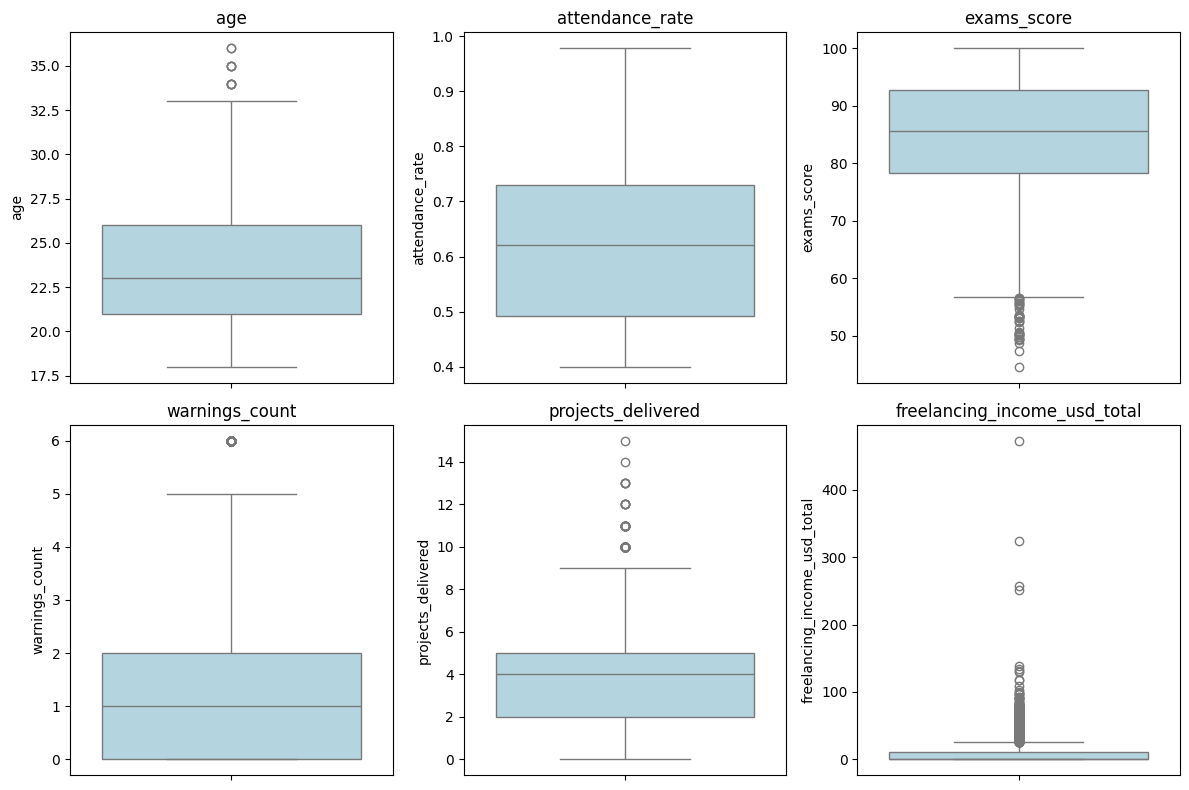

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# boxplot to display outliers in continous numerical columns

cols_name = ['age', 'attendance_rate', 'exams_score', 'warnings_count', 'projects_delivered', 'freelancing_income_usd_total']

plt.figure(figsize = (12,8))

for i, name in enumerate(cols_name,1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=ITI_data[name], color = 'lightblue')
    plt.title(name)


plt.tight_layout()
plt.show()


##### **Age** 50% of the individuals (the interquartile range, or IQR) are concentrated between approximately 21             and 25 years old.
##### **attendance_rate** 50% of the individuals have an attendance rate between 50% and 75%.
##### The data shows a high degree of variation, ranging from a minimum of about 40% to a maximum of 100%.
##### **exams_score**The scores are generally high, with 50% of the scores falling between approximately 80 and 95.
#### There is a cluster of outliers (poor performers) with scores significantly lower than the rest, ranging from        roughly 45 to 58.
##### **warnings_count** 75% of the individuals have received 2 or fewer warnings.
###### There is a small number of outliers who have received 6 warnings, much higher than the majority.
##### **projects_delivered**50% of the individuals have delivered between approximately 2 and 4.5 projects.
##### There are several outliers who have delivered a significantly higher number of projects, with the maximum          being 15 projects.

In [9]:
ITI_data.describe()

,student_id,age,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,phone,warnings_count,dropout_flag,graduated_flag
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.154200e+04,12000.000000,12000.000000,12000.000000
mean,6000.50000,23.579083,0.614146,47.869417,77.999000,85.126970,1.253500,6.821129,2.051987,3.845417,2.001252e+12,1.522833,0.000583,0.487917
std,3464.24595,3.318784,0.142646,13.854459,13.476763,9.818918,1.208798,13.864758,5.380407,2.010810,1.903045e+08,1.339388,0.024146,0.499875
min,1.00000,18.000000,0.400000,24.000000,60.000000,44.600000,0.000000,0.000000,0.000000,0.000000,2.001000e+12,0.000000,0.000000,0.000000
25%,3000.75000,21.000000,0.492000,38.000000,60.000000,78.300000,0.000000,0.000000,0.000000,2.000000,2.001102e+12,0.000000,0.000000,0.000000
50%,6000.50000,23.000000,0.621000,46.000000,72.000000,85.600000,1.000000,0.000000,0.000000,4.000000,2.001199e+12,1.000000,0.000000,0.000000
75%,9000.25000,26.000000,0.730000,58.000000,96.000000,92.700000,2.000000,10.380000,1.910000,5.000000,2.001502e+12,2.000000,0.000000,1.000000
max,12000.00000,36.000000,0.978000,89.000000,96.000000,100.000000,8.000000,473.040000,96.170000,15.000000,2.001600e+12,6.000000,1.000000,1.000000


### Exploratory Data Analysis (EDA)

#### Number of Students In Each Track

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
Num_student_track = ITI_data['track'].value_counts().sort_values(ascending=False)

Num_student_track


track
Data Science                   2116
Web Application Development    1934
Data Engineering               1660
Data Analysis                  1625
Software Testing               1224
Power BI Development           1212
AI Engineering                  927
Cybersecurity                   661
Cloud Engineering               641
Name: count, dtype: int64

In [11]:
Num_student_track.index

Index(['Data Science', 'Web Application Development', 'Data Engineering',
       'Data Analysis', 'Software Testing', 'Power BI Development',
       'AI Engineering', 'Cybersecurity', 'Cloud Engineering'],
      dtype='object', name='track')

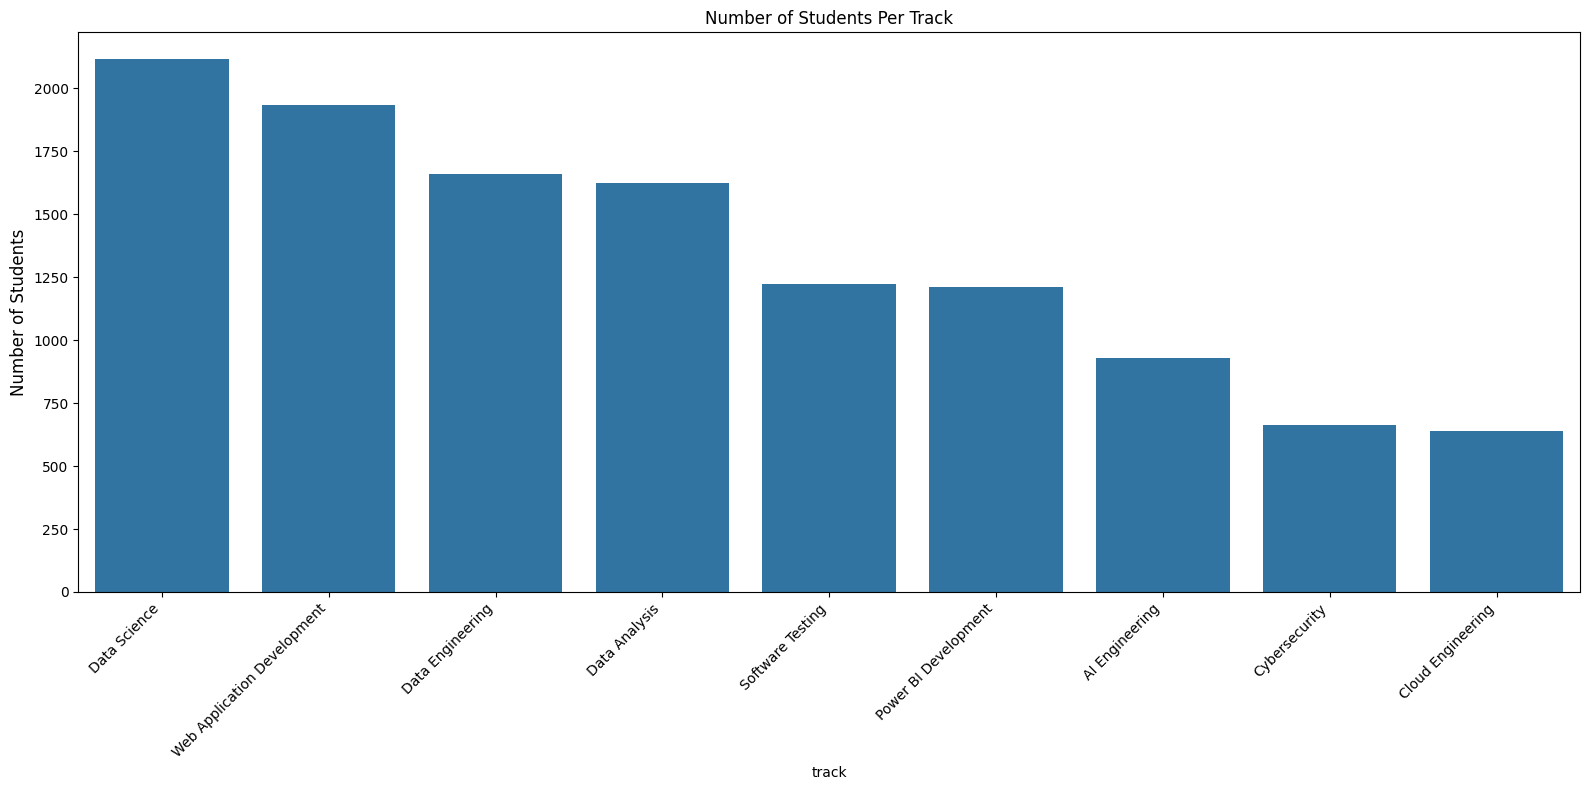

In [12]:
plt.figure(figsize=(16,8))
sns.barplot(x= Num_student_track.index, y= Num_student_track.values)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Students", fontsize=12)
plt.title("Number of Students Per Track")
plt.tight_layout()
plt.show()


#### Graduation Rate for each Track

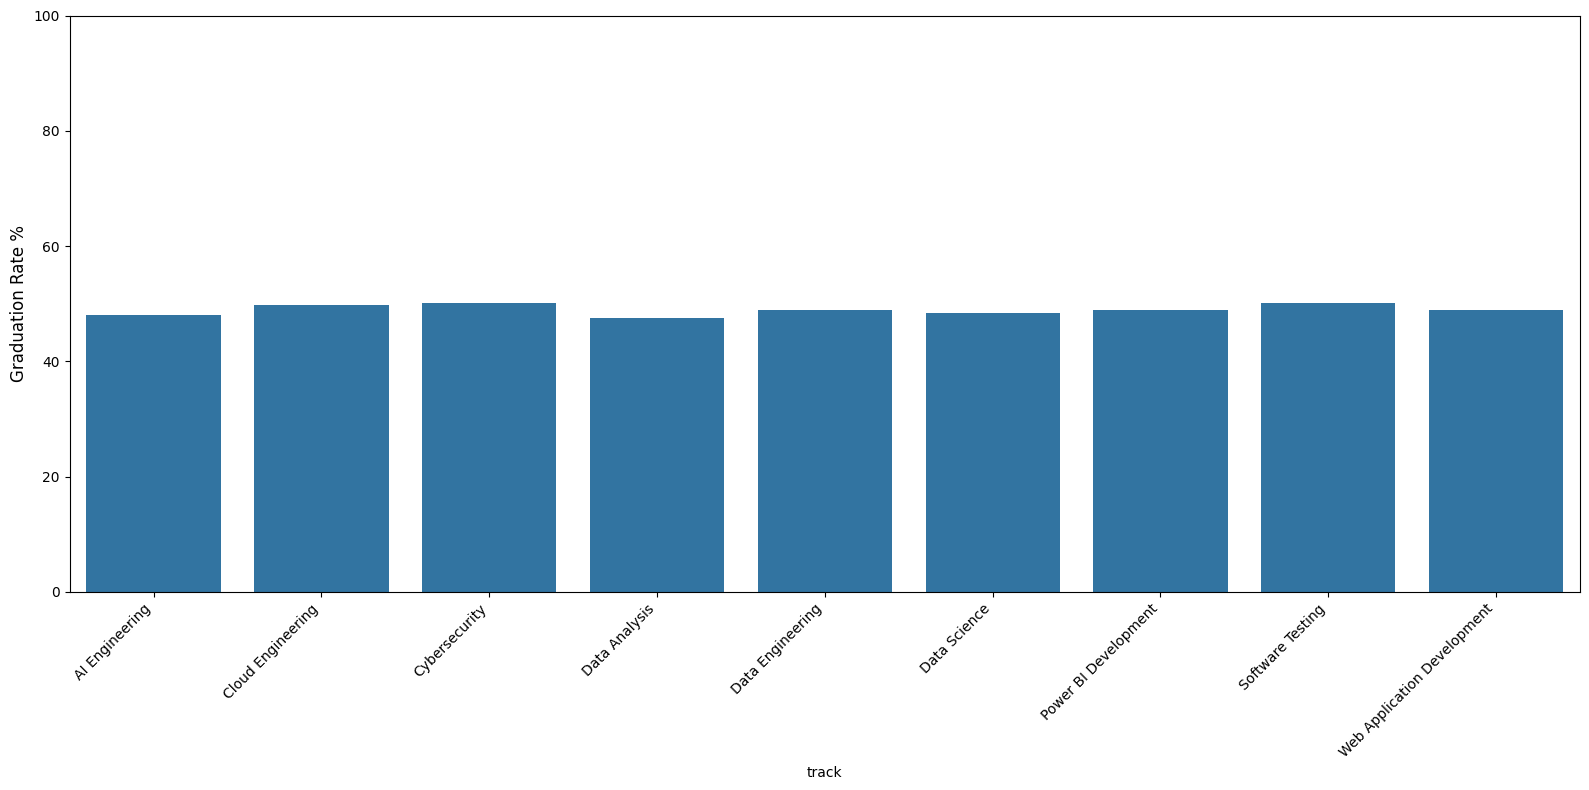

In [13]:
# graduated_flag  : graduated--> 1 , 
#graduated rate = mean of totall 1s IN graduated_flag

graduation_rate = ITI_data.groupby(["track"])["graduated_flag"].mean().reset_index()  # Ds =0.7

graduation_rate["graduated_flag"] = graduation_rate["graduated_flag"]*100   #Ds =70%

plt.figure(figsize =(16,8))

sns.barplot(data = graduation_rate, x="track", y="graduated_flag")

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.ylabel("Graduation Rate %", fontsize=12)

plt.tight_layout()
plt.show()

## Q1: Which tracks have the highest placement (Intern/Part-time/Full-time)?

In [14]:
#print( ITI_data["employment_status"].unique())
#print('\n',ITI_data.columns)
print( ITI_data["track"].unique())

['Data Science' 'Software Testing' 'Cloud Engineering' 'Data Analysis'
 'Web Application Development' 'Data Engineering' 'Power BI Development'
 'AI Engineering' 'Cybersecurity']


In [17]:
# Employment status filteration

working_status = ['Intern', 'Freelancer', 'Full-time','Part-time']
employment_status = ITI_data[ITI_data["employment_status"].isin(working_status)]
#employment_status

# Emplyment status Groub by Track
#employment = ITI_data.groupby(["track"],["employment_status"])["student_id"].count().reset_index()


employment_status            Freelancer  Full-time  Intern  Part-time
track                                                                
AI Engineering                       63        333     233        111
Cloud Engineering                    48        223     158         96
Cybersecurity                        45        233     169         76
Data Analysis                       114        588     400        207
Data Engineering                    114        549     426        226
Data Science                        143        771     514        248
Power BI Development                 89        409     302        152
Software Testing                     77        427     302        181
Web Application Development         162        693     462        245


<Axes: xlabel='track'>

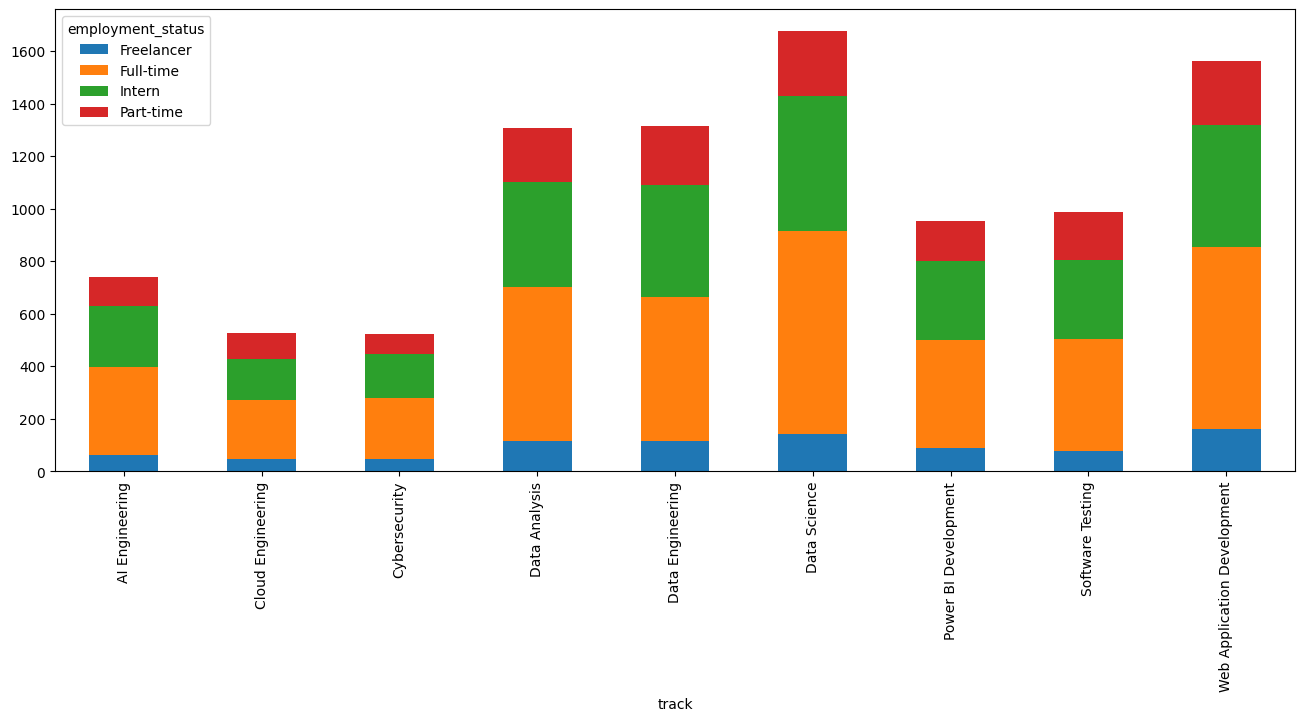

In [18]:
pivot_table = employment_status.pivot_table( index = "track",
                                          columns= "employment_status",
                                          values= "student_id",
                                          aggfunc = 'count',
                                          fill_value=0,
                                          sort =True, 
                                          margins = False)
print(pivot_table)
pivot_table.plot( kind= 'bar', stacked =True , figsize= (16,6))

#### As we can see that Data Science has the highest placement (Intern/Part-time/Full-time) then  Web Development come next
#### Data Dngineering & Data Analyisi in 3rd highst palcement which mean that there is alot of opportunities in Data faild

In [19]:
#converte pivote table to persentage
pivot_table_persent = pivot_table.div( pivot_table.sum(axis=1), axis=0)*100
#print(pivot_table_persent)
#pivot_table_persent.plot( kind= 'bar', stacked =True , figsize= (16,6))

## Q2: What's the relationship between attendance and exam scores?

In [28]:
# using correlation map
#ITI_data.columns
correlation = ITI_data["attendance_rate"].corr(ITI_data["exams_score"])
print("corrlationship",correlation)


corrlationship 0.3310619462481403


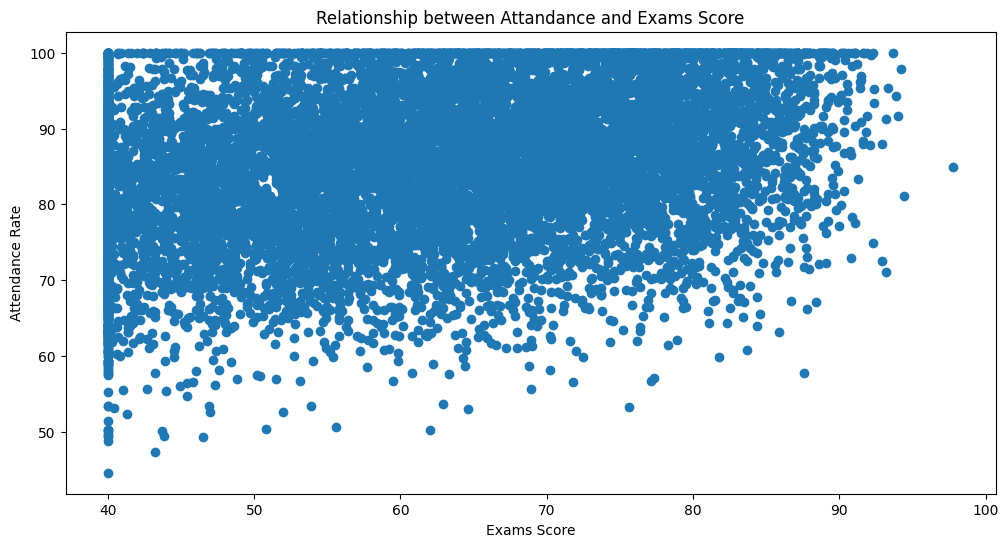

In [43]:
plt.figure(figsize=(12,6))
plt.scatter(ITI_data["attendance_rate"]*100 , ITI_data["exams_score"])
plt.xlabel("Exams Score")
plt.ylabel("Attendance Rate")
plt.title("Relationship between Attandance and Exams Score")
plt.show()

##### From Correlation and Scatter plot It's clear that exam score does not depend on attendance rate

## Q3: What attendance threshold best predicts graduation?

In [51]:
# define list of thresholds and graduated flag for each one

thresholds = [0.5, 0.6, 0.7, 0.8]
rates =[]

for t in thresholds:
    high = ITI_data[ITI_data["attendance_rate"] >= t]["graduated_flag"].mean()*100
    low = ITI_data[ITI_data["attendance_rate"] < t]["graduated_flag"].mean()*100
    rates.append({ "threshold":int(t*100),
                    "Gradrate >= threshold": high,
                     "Gradrate < threshold": low
        
                })

result = pd.DataFrame(rates)
print(result)
    

   threshold  Gradrate >= threshold  Gradrate < threshold
0         50              62.604473              9.917355
1         60              80.982061              9.738104
2         70              99.789695             25.122011
3         80              99.846154             42.588785


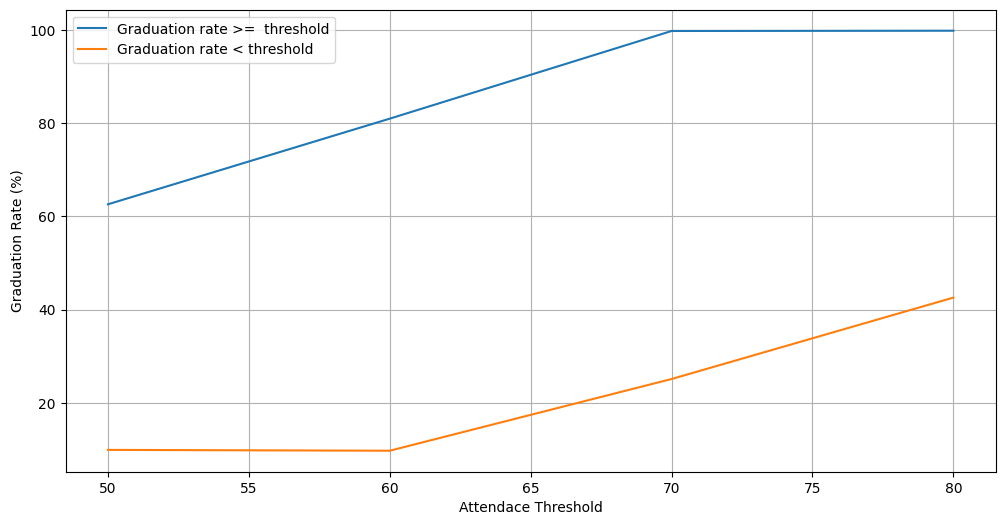

In [54]:
plt.figure(figsize=(12, 6))

plt.plot(result["threshold"], result["Gradrate >= threshold"] , label = "Graduation rate >=  threshold")
plt.plot(result["threshold"], result["Gradrate < threshold"] , label = "Graduation rate < threshold")


plt.ylabel("Graduation Rate (%)")
plt.xlabel("Attendace Threshold")
plt.legend()
plt.grid(True)
plt.show()

#### Although Threshold at 60% or 65% show higher Graduation rates, 
#### the 70% threshold provides the clearest separation with
#### - nearly all students above this attendance rate Graduating,
#### - while those below it have much lower success rates 

## Freelancing & Certifications



### Q4: Do certificates correlate with freelancing income?

##### Nubmber of certificates and freelance income 

In [23]:
ITI_data.columns

Index(['student_id', 'full_name', 'gender', 'age', 'governorate',
       'admission_cohort', 'track', 'attendance_rate', 'sessions_attended',
       'total_sessions', 'exams_score', 'certificates_count',
       'certificate_providers', 'freelancing_income_usd_total',
       'freelancing_income_usd_monthly_est', 'projects_delivered',
       'employment_status', 'internship_company', 'mentor_name', 'email',
       'phone', 'github_url', 'linkedin_url', 'warnings_count', 'dropout_flag',
       'graduated_flag', 'graduation_date'],
      dtype='object')

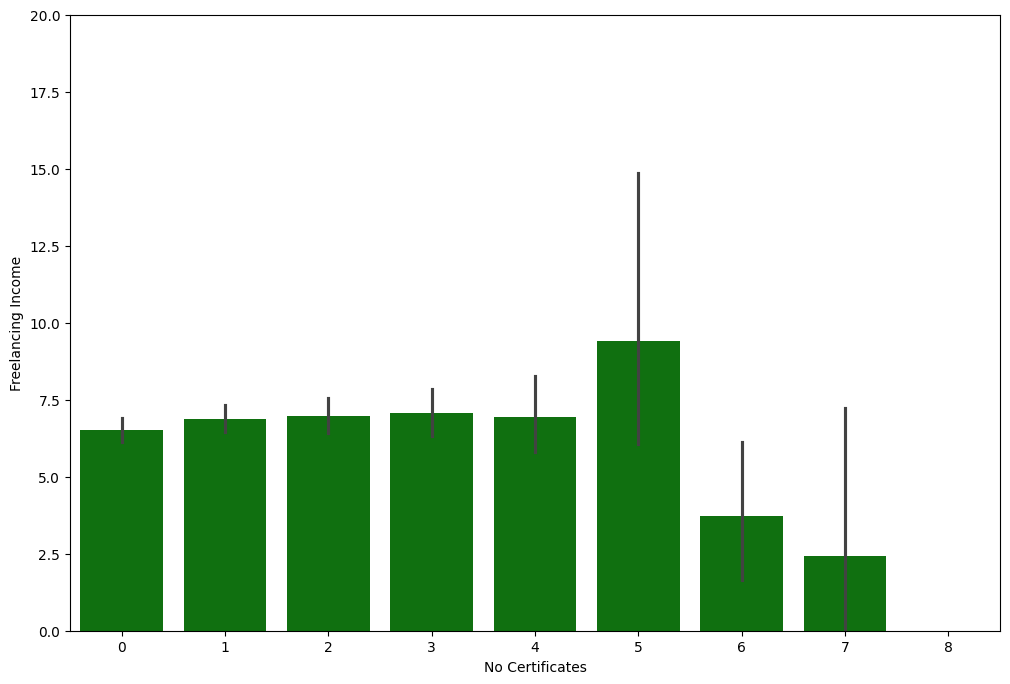

In [40]:
import matplotlib.pyplot as plt
#income_rate = ITI_data.groupby(["certificates_count"])["freelancing_income_usd_total"].mean().reset_index()

plt.figure(figsize=(12,8))

sns.barplot(x= ITI_data["certificates_count"], y = ITI_data["freelancing_income_usd_total"] , color='green')
plt.xlabel("No Certificates")
plt.ylabel("Freelancing Income")
plt.ylim(0, 20)
plt.show()
            

#### Insights 

##### A slight peak at 5 certificates, but error bars are large → high variability.

##### Suggests no strong or consistent income gain after 5 certificates.

##### Possible influence of few individuals (outliers).



##### Relation 

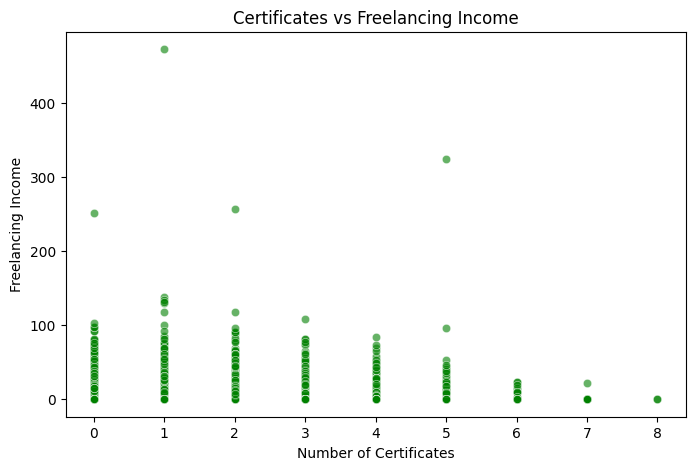

In [42]:
#df_cert = ITI_data[['certificates_count', 'freelancing_income_usd_total',]]


plt.figure(figsize=(8,5))
sns.scatterplot(
    data=ITI_data,
    x = 'certificates_count', 
    y='freelancing_income_usd_total',
    color='green', 
    alpha=0.6
)

plt.xlabel('Number of Certificates')
plt.ylabel('Freelancing Income')
plt.title('Certificates vs Freelancing Income')
plt.show()


##### Points are widely spread at all certificate levels → income varies a lot.

##### No clear linear upward trend; certificates alone don’t predict income well.

##### Indicates other factors (experience, skills, niche) likely drive income.

### Q5: Which certificate providers are common among high earners?

In [43]:
#ITI_data["certificate_providers"].value_counts
#ITI_data["certificate_providers"].unique()

In [92]:
# filter high earners
high_earners = ITI_data[ ITI_data['freelancing_income_usd_total'] > 50].copy()

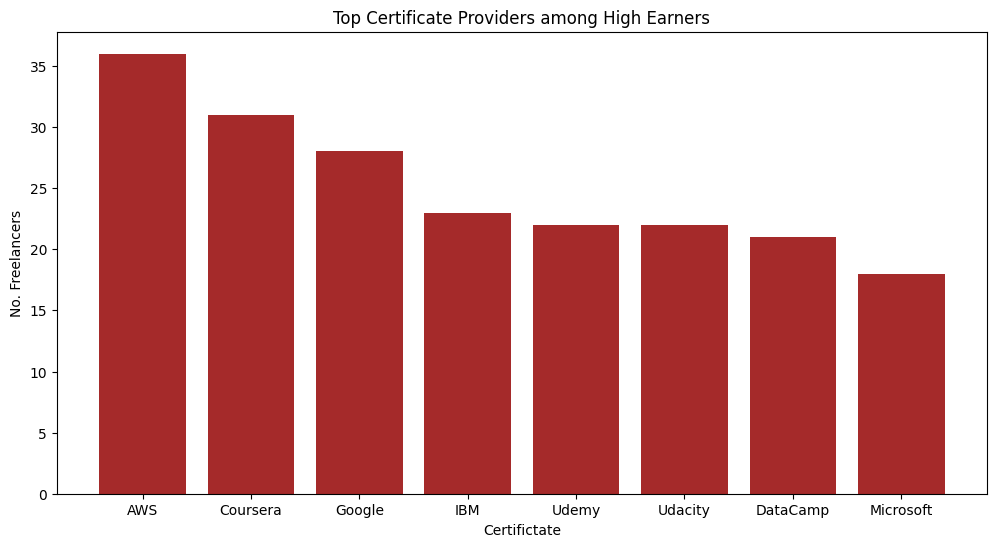

In [102]:
# Split Certifictes string in Certifict_provider col by , into list
high_earners['certificate_providers'] = ITI_data['certificate_providers'].str.split(',')

# Explode cdertificts into rows for each student
high_earners_explosed = high_earners.explode('certificate_providers') 

# group student for each Certificate
cer_counts = high_earners_explosed.groupby('certificate_providers')['student_id'].nunique()

cer_counts = cer_counts.sort_values(ascending = False)

plt.figure(figsize=(12,6))
plt.bar(cer_counts.index, cer_counts.values, color = 'brown')

plt.xlabel("Certifictate")
plt.ylabel("No. Freelancers")
plt.title('Top Certificate Providers among High Earners')

plt.show()

##### - AWS certificates are the most popular among high-earning freelancers, with the highest count compared to other providers.
##### - Coursera and Google certificates also have a strong presence among these skilled professionals, indicating high demand for credentials from these platforms.
##### - IBM, Udemy, Udacity, DataCamp, and Microsoft are recognized providers but lag behind the top three.

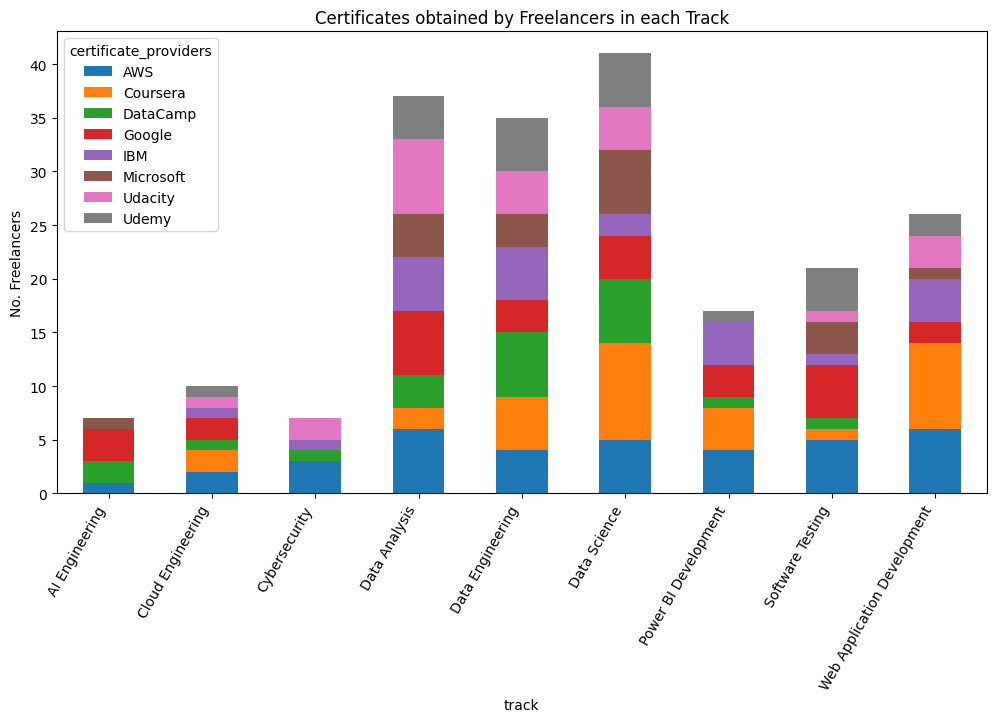

In [115]:
crt_pivot = high_earners_explosed.pivot_table( 
                                          columns = 'certificate_providers',
                                          index = 'track',
                                          values = 'student_id',
                                          aggfunc = 'count',
  )

#print(crt_pivot)

crt_pivot.plot( kind= 'bar', stacked = True, figsize = (12,6), ylabel = 'No. Freelancers', title = 'Certificates obtained by Freelancers in each Track')
plt.xticks(rotation=60, ha='right') 
plt.show()

##### - A wide variety of certificates are represented across all tracks, suggesting freelancers seek to learn from multiple platforms to gain                   more/diff skilles
##### - **Data-related** tracks have the highest number of certified freelancers, reflecting the strong demand for data skills in the freelance market.
##### - **Coursera certificates** are the most common across tracks, Especially in **Data-related** fields and**web development**.
##### - The Most popular certifications in **Data-related tracks** are from **Coursera**, **DataCamp** ,**Google**, and I**BM**, with these providers             having a strong and 
##### frequent presence in these tracks. AWS, Udacity, and Udemy also contribute, but Coursera, Google, and IBM hold the most prominence.

### Q6: Which cohorts/governorates show higher dropout or warnings?

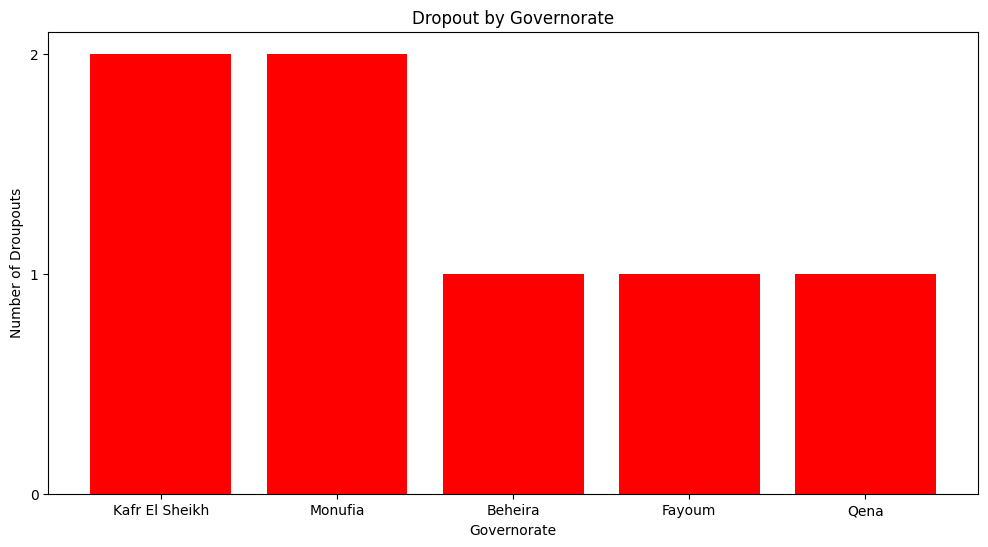

In [156]:
from matplotlib.ticker import MaxNLocator
# filter data to get no of stuadent dropout then groupby governorate 

dropout = ITI_data[ITI_data['dropout_flag'] == 1]
dropout_by_gov = dropout.groupby('governorate').size()

dropout_by_gov = dropout_by_gov.sort_values( ascending = False)
plt.figure(figsize = (12,6))
       
plt.bar(dropout_by_gov.index , dropout_by_gov.values , color = 'red')

# MaxNLocator to set interger number on y axis
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.ylabel("Number of Droupouts")
plt.xlabel("Governorate")
plt.title("Dropout by Governorate")

plt.show()       

In [181]:
# to display Droupout as Rate i divided dropout student by all stuadents in governrate

total_by_gov = ITI_data.groupby('governorate').size() #  all stuadents in governrate

dropouts_by_gov = ITI_data.groupby('governorate')['dropout_flag'].sum() # droupout stuadents in governrate

dropout_rate = (dropouts_by_gov / total_by_gov) * 100   # percentage


In [159]:
type(total_by_gov)

pandas.core.series.Series

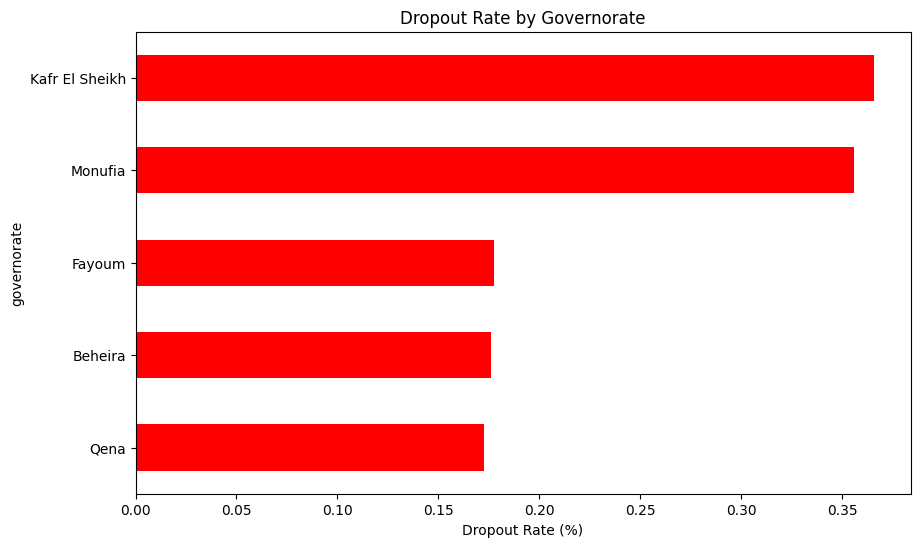

In [182]:
# series filteration to display governorate which has droupout only
dropout_rate = dropout_rate [dropout_rate >0]

dropout_rate.sort_values(ascending=True).plot(
    kind='barh', 
    color='red',
    figsize=(10,6),
    title='Dropout Rate by Governorate'
)
plt.xlabel('Dropout Rate (%)')
plt.show()


##### - Kafr El-Sheikh and Monufia recorded the highest dropout rates (~0.35), with 2 students dropping out          in each governorate.
##### - Fayoum, Beheira, and Qena each reported 1 dropout, leading to a lower rate (~0.17).
##### -All other governorates had zero dropouts, indicating relatively stable participation across most            regions.
##### -These findings highlight that dropouts are concentrated in only a few governorates, which may help           ITI target localized support or interventions to reduce future attrition.

In [ ]:

'''# convert series to dataframe 

dropout_df = pd.DataFrame({
    'total_students': total_by_gov,
    'total_dropouts': dropouts_by_gov,
    'dropout_rate': dropout_rate
}).reset_index()

# dataframe filteration 
dropout_df_f = dropout_df[dropout_df['total_dropouts'] > 0]

import matplotlib.pyplot as plt

# Sort by dropout_rate for a cleaner chart
dropout_df_f = dropout_df_f.sort_values('dropout_rate', ascending=True)

plt.figure(figsize=(10,6))

plt.barh( dropout_df_f['governorate'], dropout_df_f['dropout_rate'],   color='#0f77b4')

plt.xlabel('Dropout Rate (%)')
plt.ylabel('Governorate')
plt.title('Dropout Rate by Governorate')
plt.tight_layout()
plt.show()'''


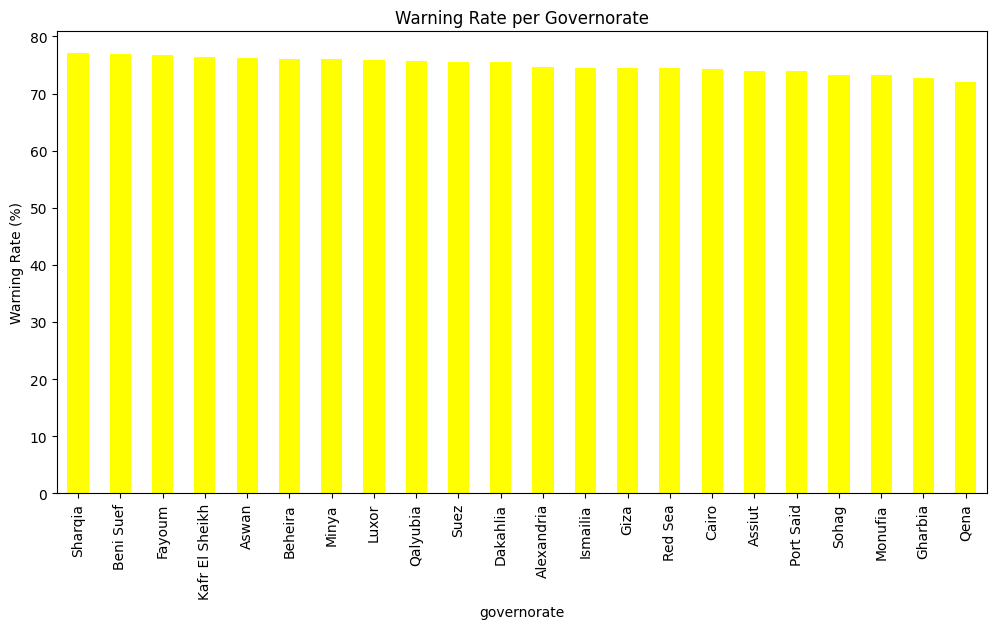

In [202]:
# to display Warning as Rate i divided no. warnings by all stuadents in governrate

total_by_gov = ITI_data.groupby('governorate').size() #  all stuadents in governrate

warnings_count = ITI_data[ITI_data['warnings_count'] >= 1].copy()

warnings_by_gov = warnings_count.groupby('governorate').size()

Warning_rate = (warnings_by_gov / total_by_gov) * 100   # percentage

#warnings_count[warnings_count['governorate'] == 'Minya']
#plt.figure(figsize =(12,6))

Warning_rate.sort_values(ascending = False).plot( kind = 'bar', color ='yellow', figsize =(12,6), title= "Warning Rate per Governorate")

plt.ylabel('Warning Rate (%)')
plt.show()

In [222]:

totalWarnings_by_gov = ITI_data.groupby('governorate')['warnings_count'].sum() # total warnins for all stuadents in governrate

number_warnings_gov = warnings_count.groupby('governorate').size() # no of students who gets warnings 

avgWorningByStudent = totalWarnings_by_gov / number_warnings_gov # average wornings for each students 

Warning_summary = pd.DataFrame({
                         'Total Warnings': totalWarnings_by_gov,
                         'Students_have_Warmings': number_warnings_gov,
                         ' Avg_Warning_per_students': avgWorningByStudent
}).reset_index()

Warning_summary = Warning_summary.sort_values(by = 'Students_have_Warmings', ascending = False)
Warning_summary

,governorate,Total Warnings,Students_have_Warmings,Avg_Warning_per_students
16,Qalyubia,908,440,2.063636
5,Cairo,880,433,2.032333
7,Fayoum,874,432,2.023148
3,Beheira,882,432,2.041667
4,Beni Suef,880,420,2.095238
9,Giza,826,419,1.971360
17,Qena,900,418,2.153110
11,Kafr El Sheikh,849,418,2.031100
21,Suez,874,416,2.100962
12,Luxor,848,415,2.043373


In [233]:
#ITI_data = ITI_data[(ITI_data['governorate'] == 'Cairo') & (ITI_data['warnings_count'] >= 1)]
#ITI_data

### Q8: Are projects_delivered a stronger predictor of employment than exams?

In [35]:
ITI_data.groupby('employment_status')[['projects_delivered', 'exams_score']].mean()

,projects_delivered,exams_score
employment_status,,
Freelancer,3.898246,85.210175
Full-time,3.831519,85.037351
Further Study,3.872681,85.033980
Intern,3.841537,85.174983
Part-time,3.830739,85.095331
Unemployed,3.857959,85.391673


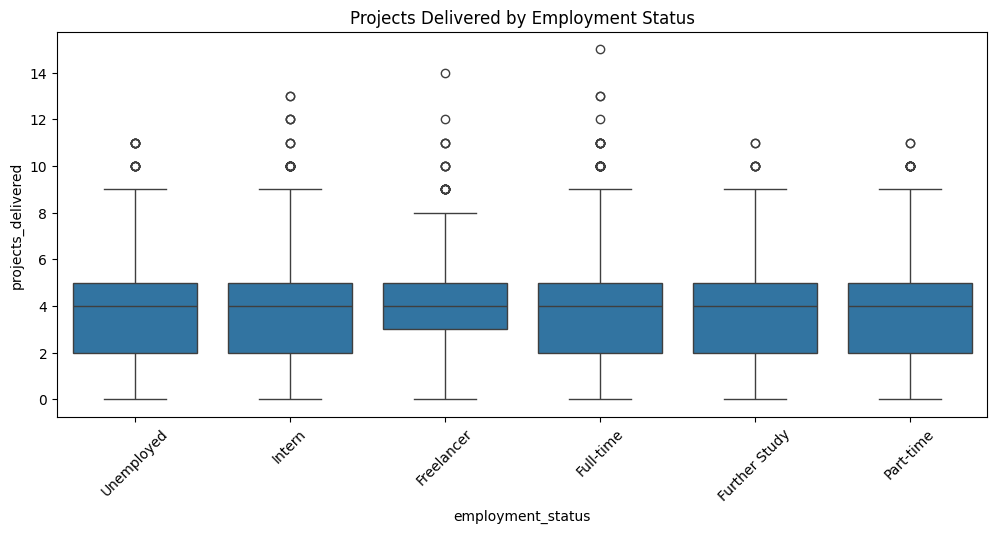

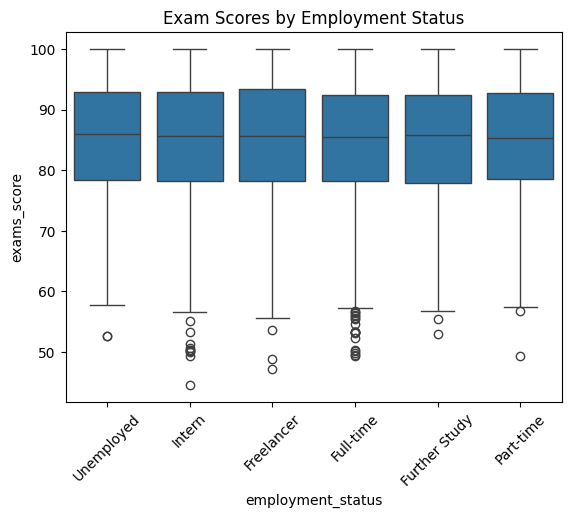

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(x='employment_status', y='projects_delivered', data=ITI_data)
plt.title('Projects Delivered by Employment Status')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='employment_status', y='exams_score', data=ITI_data)
plt.title('Exam Scores by Employment Status')
plt.xticks(rotation=45)
plt.show()


#####  High exam scores are common regardless of the individual's employment status, meaning the score does not           significantly discriminate between the groups.
##### The typical number of projects delivered is the same for every group, meaning this metric also does not            significantly discriminate between the groups.
#### Since both metrics show a near-uniform distribution across all employment status categories, the data              suggests that neither projects_delivered nor exams_score is a good predictor of an individual's employment           status.Therefore, it is impossible to take that one is a "stronger" predictor than the other.


### Q10: Build quick KPIs: Graduation Rate, Employment Rate, Avg Exam, Avg Attendance, Freelancers %, Avg Freelance Income by track.

In [41]:
# prepare dashboard  kpi cards
graduation_rate = ITI_data["graduated_flag"].mean()*100  
Avg_Attendance = ITI_data["attendance_rate"].mean()*100  

Avg_Exam = ITI_data["exams_score"].mean()*100 
Freelancers = (ITI_data["employment_status"] == "Freelancer").mean()*100

employment = ['Intern','Freelancer','Part-time','Full-time']
employment_rate = ITI_data["employment_status"].isin(employment).mean()*100

freelance_income_rate = ITI_data[ITI_data["employment_status"] == "Freelancer"].groupby("track")["freelancing_income_usd_total"].mean()


In [49]:
#import streamlit as st
#streamlit run dashboard.py


In [48]:
'''import streamlit as st

# Build Dashboard
# st.columns(n)   divide webpage to N columns
# .metric()      used todisplay value as card

st.title("ITI Sudents KPI")
col1, col2, col3 = st.columns(3)

col1.metric("Graduation Rate", f"{graduation_rate:.1f}%")
col2.metric("Employment Rate ", f"{employment_rate:.1f}%")
col3.metric("Freelancers %" , f"{Freelancers:.1f}%")

col4, col5 = st.columns(2)
col4.metric("Average Exam Rate", f"{Avg_Exam:.1f}%")
col5.metric(" Average Attandance", f"{Avg_Attendance:.1f}%")
st.subheader("Average Freelance Income by Track")
st.bar_chart(freelance_income_rate)
'''

'import streamlit as st\n\n# Build Dashboard\n# st.columns(n)   divide webpage to N columns\n# .metric()      used todisplay value as card\n\nst.title("ITI Sudents KPI")\ncol1, col2, col3 = st.columns(3)\n\ncol1.metric("Graduation Rate", f"{graduation_rate:.1f}%")\ncol2.metric("Employment Rate ", f"{employment_rate:.1f}%")\ncol3.metric("Freelancers %" , f"{Freelancers:.1f}%")\n\ncol4, col5 = st.columns(2)\ncol4.metric("Average Exam Rate", f"{Avg_Exam:.1f}%")\ncol5.metric(" Average Attandance", f"{Avg_Attendance:.1f}%")\nst.subheader("Average Freelance Income by Track")\nst.bar_chart(freelance_income_rate)\n'